In [28]:
# import Legacy Business Registry; cleaned up and manually classified
# in Excel prior to uploading here

import numpy as np
import pandas as pd


df = pd.read_csv("LegacyBiz1.csv")

In [29]:
df['Business ID'] = 1

In [30]:
df.head()

Name                         Address  \
0                       Academy of Ballet              2121 Market Street   
1                           Acción Latina                2958 24th Street   
2  Adobe Books and Arts Cooperative, Inc.                3130 24th Street   
3               AIDS Legal Referral Panel  1663 Mission Street, Suite 500   
4                     Alioto’s Restaurant            #8 Fisherman’s Wharf   

            City       State            Phone                         Website  \
0  San Francisco  California    415-552-1166   https://sfacademyofballet.com/   
1  San Francisco  California    415-648-1045      http://accionlatina.org/en/   
2  San Francisco  California  (415) 864-3936      https://www.adobebooks.com/   
3  San Francisco  California     415-701-1100            http://www.alrp.org/   
4  San Francisco  California    415-673-0183             https://aliotos.com/   

  Date_OnRegistry                        Type   Latitude   Longitude  \
0        11/12/19                      School  37.766983 -122.429272   
1         3/17/17      Community / Non-profit  37.752898 -122.411270   
2         1/13/20                   Bookstore  37.752666 -122.414778   
3         1/22/18      Community / Non-profit  37.771147 -122.419191   
4         1/14/19  Restaurant / Food Business  37.808948 -122.416046   

   Business ID  
0            1  
1            1  
2            1  
3            1  
4            1

In [31]:
# find unique values in the list, as some entries appear multiple times
# due to having branches at different locations

df['Name'].unique()     

array(['Academy of Ballet', 'Acción Latina',
       'Adobe Books and Arts Cooperative, Inc.',
       'AIDS Legal Referral Panel', 'Alioto’s Restaurant',
       'Analytical Psychology Club', 'Anchor Brewing Company',
       'Anchor Oyster Bar', 'Anco Iron & Construction Inc.',
       'Animal Company', 'Anresco Laboratories',
       'Armstrong Carpet & Linoleum Company', 'Arrow Stamp & Coin Co.',
       'ArtHaus Gallery', 'Ave Bar', 'Avedano’s Holly Park Market',
       'Babylon Burning Screen Printing', 'Balboa Cafe', 'Balboa Theatre',
       'Bay Area Video Coalition, Inc.', 'Bay View Boat Club',
       'Beck’s Motor Lodge', 'Beep’s Burgers', 'Benkyodo Company',
       'Bi-Rite Market', 'BIX Restaurant', 'Blue Bear School of Music',
       "Bo's Flower Stand", 'Books Inc.', 'Boudin Bakery', 'Brazen Head',
       'Britex Fabrics', 'Brownies Hardware', 'Butter Bar & Restaurant',
       'Cable Car Clothiers', 'Café du Nord', 'Café International',
       'Caffé Sapore', 'Caffe Trieste', 'C

In [32]:
#breakdown of businesses by type

df['Type'].value_counts()

Restaurant / Food Business    72
Community / Non-profit        28
Arts Organization             20
Recreation                    18
Bar / Brewery                 18
Grocery                       18
Fashion / Fabric              14
Bookstore                     14
Construction / Materials      13
Hobby Shop                    13
School                        11
Live Performance              10
Medical                        7
Automotive                     5
Floral                         2
Laundry                        1
Pet Store                      1
Research / Lab                 1
Lodging                        1
Name: Type, dtype: int64

In [33]:
import matplotlib.pyplot as plt

In [34]:
# activate the Seaborn aesthetic defaults

import seaborn as sns
sns.set()  

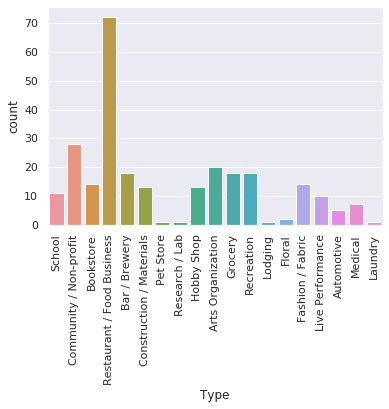

In [35]:
# visualize legacy businesses by typology; food businesses far outnumber other types

sns.countplot(data=df, x='Type')
plt.xticks(rotation='vertical')

plt.show()

In [36]:
import matplotlib.pyplot as plt
import geopandas as gpd

from shapely.geometry import Point, LineString, Polygon

In [37]:
pip install geoplot pip --upgrade pip

Requirement already up-to-date: geoplot in /srv/app/venv/lib/python3.6/site-packages (0.4.0)
Requirement already up-to-date: pip in /srv/app/venv/lib/python3.6/site-packages (20.1)
Note: you may need to restart the kernel to use updated packages.


In [38]:
import geoplot

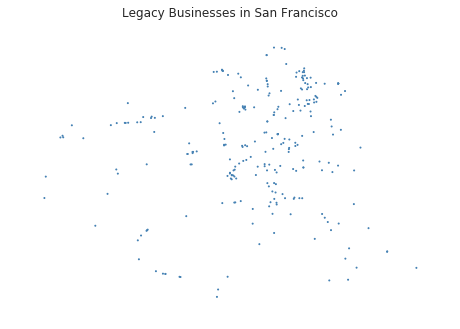

In [39]:
# Create GeoDataFrame of legacy businesses and identify latitude & longitude
legacybusiness = gpd.read_file('LegacyBiz1.csv')

legacybusiness.Longitude = legacybusiness.Longitude.astype('float64')
legacybusiness.Latitude = legacybusiness.Latitude.astype('float64')

legacybusiness_geometry = [Point(xy) for xy in zip(legacybusiness.Longitude, legacybusiness.Latitude)]
gdf = gpd.GeoDataFrame(legacybusiness, geometry=legacybusiness_geometry)

# Visualize each business as a point

ax = geoplot.pointplot(legacybusiness, s = 1)  # size of each point

ax.set_title("Legacy Businesses in San Francisco")

plt.show()

In [40]:
# Convert LegacyBusinesses to a GeoDataFrame
nhood_map = gpd.read_file('geo_export_c72d5138-0ae8-43d9-ab2a-fced89798b3e.shp')

# Map Projections
legacybusiness.crs = nhood_map.crs 

# Merge the two dataframes, how=left to ensure that neighborhoods with no legacy businesses
#still show up
legacybusiness = gpd.sjoin(legacybusiness,nhood_map,how='left')

In [41]:
#Creating a dataframe mapping neighborhoods to legacy business counts
legacybusiness_count = legacybusiness.nhood.value_counts(dropna=True)

nhood_counts = pd.DataFrame({'nhood':legacybusiness_count.index, 'legacybusiness_count':legacybusiness_count.values})
nhood_counts


nhood  legacybusiness_count
0                          Mission                    36
1   Financial District/South Beach                    19
2              Castro/Upper Market                    18
3            Bayview Hunters Point                    16
4                       Tenderloin                    16
5                        Chinatown                    15
6                  South of Market                    15
7                   Haight Ashbury                    11
8                      North Beach                    10
9                   Outer Richmond                    10
10                 Pacific Heights                    10
11                          Marina                     9
12                    Hayes Valley                     9
13                  Inner Richmond                     8
14                    Russian Hill                     8
15              West of Twin Peaks                     7
16                      Noe Valley                     6
17                 Sunset/Parkside                     6
18                       Japantown                     5
19      Oceanview/Merced/Ingleside                     5
20                        Nob Hill                     5
21                  Bernal Heights                     4
22                    Potrero Hill                     4
23                Western Addition                     4
24                     Mission Bay                     3
25                   Outer Mission                     2
26                Presidio Heights                     1
27                        Presidio                     1
28                      Twin Peaks                     1
29                       Excelsior                     1
30                    Inner Sunset                     1
31               Lone Mountain/USF                     1

In [43]:
#Create a new column to include counts in our original neighborhood map
#Replacing null counts with 0

nhood_map = nhood_map.merge(nhood_counts
, how='left', on = 'nhood')

nhood_map = nhood_map.fillna(0)

<function matplotlib.pyplot.show(*args, **kw)>

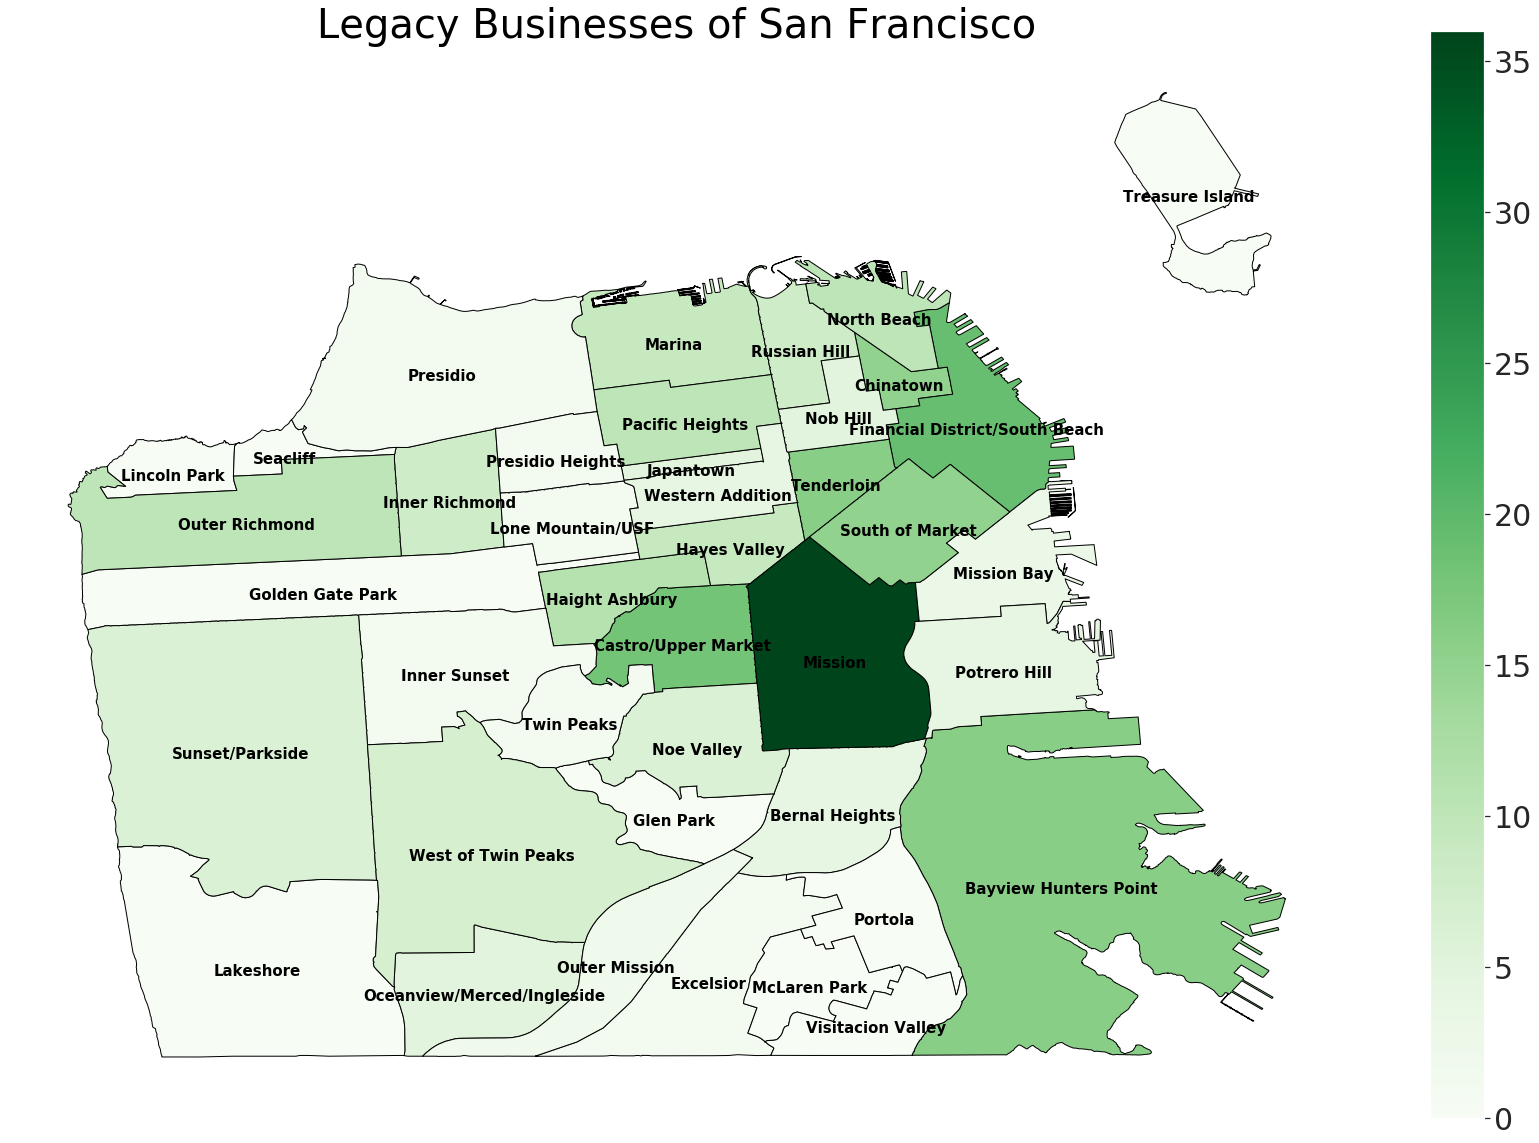

In [44]:
#Color the map according to the total number of businesses
plt.rcParams['legend.fontsize'] = 'large'
ax = nhood_map.plot(column = 'legacybusiness_count', cmap='Greens',figsize=(30,20),
                    legend =True, linewidth=1,edgecolor='black')
#Formatting
ax.axis('off')
ax.set_title('Legacy Businesses of San Francisco',fontsize=40,color='black')
fig = ax.figure
cb_ax = fig.axes[1]
cb_ax.tick_params(labelsize=30)
#Label the neighborhoods
for i in nhood_map.index:
 coords = nhood_map.geometry[i].centroid.coords[0]
 ax.annotate(s = nhood_map['nhood'][i], xy = coords,horizontalalignment='center',verticalalignment='top' ,color='black',fontweight='heavy',fontsize=15)
plt.show

In [ ]:
#utilize folium for interactive capabilities & more intuitive formatting options
#import the MarkerCluster plug-in 

import folium 
import html
from folium.plugins import MarkerCluster 

In [45]:
# Setting the boundaries for the SF map
# Generating a choropleth map based on neighborhood divisions using concentration of SF Legacy Businesses

map_sf = folium.Map(location=[37.7761542,-122.3814247], tiles='CartoDB positron', zoom_start = 12)
map_sf.choropleth(
    geo_data='SFNeighborhoods_Real.geojson',
    data = nhood_map,
    nan_fill_color = 'white',
    columns = ['nhood','legacybusiness_count'],
    key_on = 'feature.properties.nhood',
    fill_color = 'YlGn', line_weight= 0.5,
    legend_name = 'San Francisco Legacy Business Count by Neighborhood')

for j in range(legacybusiness.shape[0]):
    location = [legacybusiness['Latitude'][j], legacybusiness['Longitude'][j]]
    folium.Marker(location,
                    popup = 'Data',
                    tooltip = 'legacy businesses in ur area').add_to(map_sf)
map_sf

/srv/app/venv/lib/python3.6/site-packages/folium/folium.py:415: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


In [46]:
#create dictionary mapping business type to icon
iconmap = {"Restaurant / Food Business" : "fa-cutlery",
          "Community / Non-profit" : "fa-heart",
          "Arts Organization" : "fa-paint-brush",
          "Bar / Brewery" : "fa-glass",
          "Grocery" : "fa-shopping-cart",
          "Recreation" : "fa-dribbble",
          "Bookstore" : "fa-book",
          "Fashion / Fabric" : "fa-scissors",
          "Hobby Shop" : "fa-puzzle-piece",
          "Construction / Materials" : "fa-wrench",
          "School" : "fa-graduation-cap",
          "Live Performance" : "fa-music",
          "Medical" : "fa-medkit",
          "Automotive" : "fa-car",
          "Floral" : "fa-pagelines",
          "Laundry" : "fa-tag",
          "Pet Store" : "fa-paw",
          "Research / Lab" : "fa-flask",
          "Lodging" : "fa-home"
          }

In [47]:
# Adding the MarkerClusters for better readability at the established zoom level

map_sf = folium.Map(location=[37.7761542,-122.3814247], tiles='CartoDB positron', zoom_start = 12)
map_sf.choropleth(
    geo_data='SFNeighborhoods_Real.geojson',
    data = nhood_map,
    nan_fill_color = 'white',
    columns = ['nhood','legacybusiness_count'],
    key_on = 'feature.properties.nhood',
    fill_color = 'Greens', line_weight= 0.5,
    legend_name = 'San Francisco Legacy Business Count by Neighborhood')

# Add neighborhood tooltip
folium.GeoJson(data='SFNeighborhoods_Real.geojson',
               name='Neighborhood',smooth_factor=2,
               style_function=lambda x: {'color':'black','fillColor':'transparent','weight':1},
                tooltip=folium.GeoJsonTooltip(fields=['nhood'],
                                              labels=False,
                                              sticky=False),
               highlight_function=lambda x: {'weight':3,'fillColor':'grey'}
              ).add_to(map_sf)

# Creating a marker cluster for each neighborhood
# Adding legacy business markers to each neighborhood cluster with icon based on business type
# Replace apostrophes and accents to render correctly

for i in range(nhood_map.shape[0]):
    cluster = MarkerCluster(showCoverageOnHover = False).add_to(map_sf)
    for j in range(legacybusiness.shape[0]):
        if legacybusiness['nhood'][j] == nhood_map['nhood'][i]:
            business_name = legacybusiness['Name'][j].replace("’", "\'").replace('ó','&oacute').replace('é','&eacute')
            tooltip = "{}".format(business_name) 
            location = [legacybusiness['Latitude'][j], legacybusiness['Longitude'][j]]
            biztype = legacybusiness["Type"][j].strip()
            folium.Marker(location,
                          popup="""
                          <i>Name: </i> <br> <b>{}</b> <br> 
                          <i>Address: </i><b><br>{}</b><br>
                          <i>Phone: </i><b><br>{}</b><br>
                          <i>Website: </i><a href = "{}"target="_blank">{}</a>
                          <i>Type: </i><b><br>{}</b><br>
                          <i>Added to Registry: </i><b><br>{}</b><br>""".format(
                   business_name, 
                   legacybusiness['Address'][j], 
                   legacybusiness['Phone'][j].strip(), 
                   legacybusiness['Website'][j], 
                   legacybusiness['Website'][j],
                   legacybusiness['Type'][j], 
                   legacybusiness['Date_OnRegistry'][j]), 
                         icon=folium.Icon(icon=iconmap[biztype], prefix='fa'),
                         tooltip = tooltip).add_to(cluster)
            
map_sf